In [19]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset = pd.read_csv('/content/drive/MyDrive/machine learning udemy r/Machine Learning A-Z (Codes and Datasets)/Part 6 - Reinforcement Learning/Section 32 - Upper Confidence Bound (UCB)/Python/Ads_CTR_Optimisation.csv')

dataset

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


In [20]:
import random
N = 500
d = 10
ads_selected = []
numbers_of_rewards_1= [0]*d
numbers_of_rewards_0 = [0]*d
total_rewards = 0

for n in range(0,N):
  ad = 0
  max_random = 0
  for i in range(0,d):
        random_theta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        if (random_theta > max_random):
          max_random = random_theta
          ad = i
  ads_selected.append(ad)
  reward = dataset.values[n , ad]

  if reward == 1:
    numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1

  if reward == 0:
    numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1

  total_rewards = total_rewards + reward


In [21]:
numbers_of_rewards_0

[49, 14, 25, 29, 103, 21, 37, 80, 25, 23]

In [22]:
numbers_of_rewards_1

[9, 0, 3, 5, 43, 1, 6, 22, 3, 2]

In [23]:
total_rewards

94

In [24]:
ads_selected

[6,
 3,
 0,
 8,
 1,
 5,
 8,
 9,
 7,
 2,
 7,
 4,
 2,
 7,
 1,
 9,
 5,
 0,
 3,
 2,
 5,
 8,
 9,
 4,
 3,
 1,
 4,
 2,
 8,
 6,
 4,
 4,
 1,
 4,
 4,
 4,
 9,
 2,
 2,
 0,
 0,
 5,
 3,
 3,
 6,
 6,
 6,
 3,
 4,
 6,
 7,
 7,
 9,
 4,
 6,
 2,
 9,
 6,
 9,
 0,
 7,
 4,
 9,
 0,
 2,
 3,
 7,
 2,
 8,
 8,
 4,
 4,
 7,
 4,
 3,
 1,
 3,
 2,
 5,
 2,
 4,
 6,
 4,
 4,
 4,
 4,
 7,
 2,
 7,
 6,
 4,
 8,
 6,
 2,
 4,
 4,
 6,
 3,
 4,
 1,
 7,
 4,
 0,
 0,
 4,
 4,
 3,
 4,
 2,
 7,
 3,
 7,
 0,
 0,
 3,
 3,
 6,
 3,
 6,
 0,
 5,
 6,
 7,
 0,
 3,
 6,
 6,
 5,
 4,
 7,
 1,
 6,
 6,
 0,
 6,
 7,
 0,
 6,
 7,
 0,
 8,
 7,
 2,
 0,
 7,
 0,
 3,
 5,
 5,
 7,
 6,
 4,
 1,
 3,
 2,
 6,
 5,
 0,
 9,
 7,
 7,
 0,
 7,
 4,
 9,
 5,
 0,
 7,
 4,
 6,
 8,
 2,
 0,
 2,
 7,
 4,
 8,
 3,
 0,
 9,
 0,
 7,
 9,
 0,
 6,
 4,
 0,
 2,
 8,
 7,
 0,
 4,
 7,
 7,
 0,
 7,
 4,
 2,
 5,
 3,
 7,
 1,
 5,
 6,
 4,
 0,
 7,
 9,
 4,
 7,
 9,
 8,
 6,
 7,
 4,
 7,
 5,
 7,
 7,
 7,
 0,
 4,
 7,
 7,
 7,
 4,
 7,
 0,
 7,
 7,
 0,
 7,
 7,
 7,
 0,
 9,
 7,
 8,
 7,
 6,
 3,
 0,
 5,
 7,
 7,
 6,
 5,
 7,
 9,
 7,


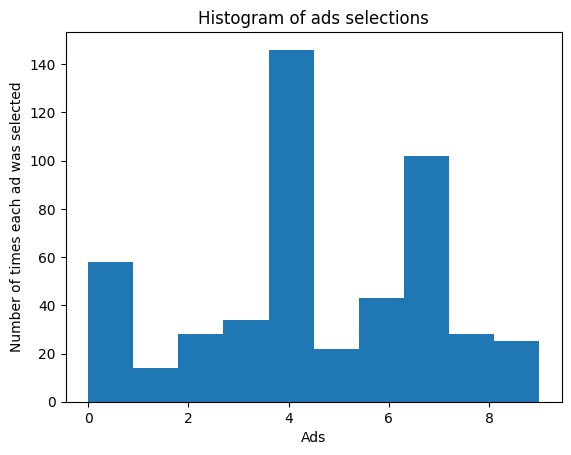

In [25]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()